# Supervised Machine Learning: Regression [6.4] - Task

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

##### --------------------------------------------------

### [2] Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

In [1]:
# Import All Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Assigning Path

path = r'/Users/elia/Desktop/DATA ANALYST/CAREER FOUNDRY/B - Data Analytics Immersion/6 - ADVANCED ANALYTICS & DASHBOARD'

In [4]:
# Import DataSet

df_house = pd.read_csv(os.path.join(path, 'King County House Market Analysis', '02 - Data', 'Prepared Data', 'house_dataset_clean.csv'))

In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

##### --------------------------------------------------

### [3] Clean your data so that it’s ready for analysis.

In [6]:
# Checking columns

df_house.columns

Index(['Unnamed: 0', 'house_id', 'date', 'price', 'bedrooms', 'bathrooms',
       'house_total_sqft', 'lot_total_sqft', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'floors_sqft', 'basement_sqft', 'year_built',
       'year_renovated', 'zipcode', 'latitude', 'longitude', 'sqft_living15',
       'sqft_lot15', 'waterfront_text', 'view_text', 'house_condition',
       'grade_text'],
      dtype='object')

In [7]:
# Checking dataframe

df_house.head(20)

,Unnamed: 0,house_id,date,price,bedrooms,bathrooms,house_total_sqft,lot_total_sqft,floors,waterfront,...,year_renovated,zipcode,latitude,longitude,sqft_living15,sqft_lot15,waterfront_text,view_text,house_condition,grade_text
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,0,98178,47.5112,-122.257,1340,5650,No,No View,Average,Average
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,1991,98125,47.7210,-122.319,1690,7639,No,No View,Average,Average
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,0,98028,47.7379,-122.233,2720,8062,No,No View,Average,Low Average
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,0,98136,47.5208,-122.393,1360,5000,No,No View,Very Good,Average
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,0,98074,47.6168,-122.045,1800,7503,No,No View,Average,Good
5,5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,...,0,98053,47.6561,-122.005,4760,101930,No,No View,Average,Excellent
6,6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,...,0,98003,47.3097,-122.327,2238,6819,No,No View,Average,Average
7,7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,...,0,98198,47.4095,-122.315,1650,9711,No,No View,Average,Average
8,8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,...,0,98146,47.5123,-122.337,1780,8113,No,No View,Average,Average
9,9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,...,0,98038,47.3684,-122.031,2390,7570,No,No View,Average,Average


In [8]:
# Checking dataframe

df_house.shape

(21613, 26)

##### Missing values

In [9]:
# Check for missing values

df_house.isnull().sum()

# No missing values to handle

Unnamed: 0          0
house_id            0
date                0
price               0
bedrooms            0
bathrooms           0
house_total_sqft    0
lot_total_sqft      0
floors              0
waterfront          0
view                0
condition           0
grade               0
floors_sqft         0
basement_sqft       0
year_built          0
year_renovated      0
zipcode             0
latitude            0
longitude           0
sqft_living15       0
sqft_lot15          0
waterfront_text     0
view_text           0
house_condition     0
grade_text          0
dtype: int64

In [10]:
# Checking datatypes

df_house.dtypes

Unnamed: 0            int64
house_id              int64
date                 object
price               float64
bedrooms              int64
bathrooms           float64
house_total_sqft      int64
lot_total_sqft        int64
floors              float64
waterfront            int64
view                  int64
condition             int64
grade                 int64
floors_sqft           int64
basement_sqft         int64
year_built            int64
year_renovated        int64
zipcode               int64
latitude            float64
longitude           float64
sqft_living15         int64
sqft_lot15            int64
waterfront_text      object
view_text            object
house_condition      object
grade_text           object
dtype: object

##### Duplicates check

In [11]:
# Checking duplicates

dups = df_house.duplicated()

In [12]:
dups.shape

(21613,)

In [13]:
# No duplicates

##### Extreme values checks

/var/folders/kg/d6djty_168l6kzcc718bcldm0000gn/T/ipykernel_5630/2283582163.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_house['price'], bins=25) # Shows extreme values


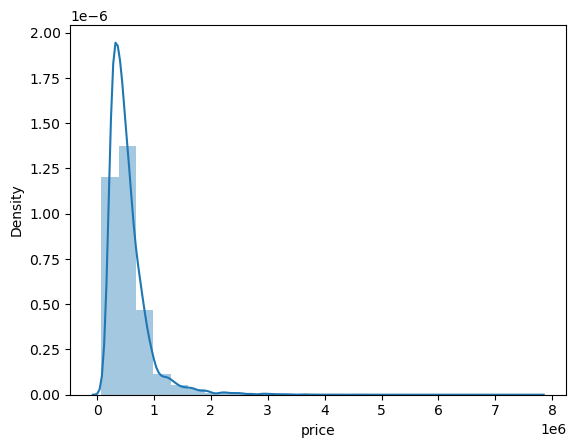

In [14]:
sns.distplot(df_house['price'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

plt.show()

In [15]:
# Create a data frame with just the variables for modeling and regression with machine learning

data_to_plot = df_house[['price', 'bedrooms', 'bathrooms', 'house_total_sqft', 'lot_total_sqft', 'floors', 'condition', 'grade', 'zipcode']]

In [16]:
# Checking dataframe

data_to_plot.head(20)

,price,bedrooms,bathrooms,house_total_sqft,lot_total_sqft,floors,condition,grade,zipcode
0,221900.0,3,1.00,1180,5650,1.0,3,7,98178
1,538000.0,3,2.25,2570,7242,2.0,3,7,98125
2,180000.0,2,1.00,770,10000,1.0,3,6,98028
3,604000.0,4,3.00,1960,5000,1.0,5,7,98136
4,510000.0,3,2.00,1680,8080,1.0,3,8,98074
5,1225000.0,4,4.50,5420,101930,1.0,3,11,98053
6,257500.0,3,2.25,1715,6819,2.0,3,7,98003
7,291850.0,3,1.50,1060,9711,1.0,3,7,98198
8,229500.0,3,1.00,1780,7470,1.0,3,7,98146
9,323000.0,3,2.50,1890,6560,2.0,3,7,98038


##### --------------------------------------------------

### [4] Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

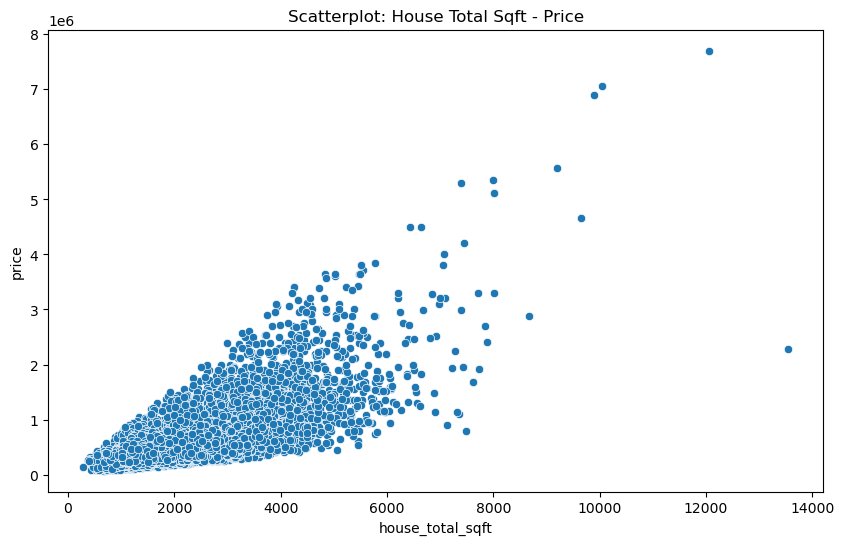

In [17]:
# Scatterplot showing relationship between total house square footage and price

scatterplot_price_sqft = plt.figure(figsize=(10,6))

sns.scatterplot(
    data=data_to_plot,
    x='house_total_sqft',
    y='price'
)

plt.title('Scatterplot: House Total Sqft - Price')
plt.xlabel('house_total_sqft')
plt.ylabel('price')
plt.show()

In [20]:
# Export the Scatterplot

scatterplot_price_sqft.figure.savefig(os.path.join(path, 'King County House Market Analysis', '04 - Analysis', 'Visualizations', 'scatterplot_price_sqft.png'))

##### --------------------------------------------------

### [5] State your hypothesis in a markdown cell within your Jupyter notebook.

#### A Bigger House Total Sqft Increases House Price.
#### Higher Grade Increases House Price.
#### Higher Bathroom Number Increases House Price.

##### --------------------------------------------------

### [6] Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = data_to_plot['house_total_sqft'].values.reshape(-1,1)
y = data_to_plot['price'].values.reshape(-1,1)

In [22]:
# Checking X

X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], shape=(21613, 1))

In [23]:
# Checking y

y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]], shape=(21613, 1))

##### --------------------------------------------------

### [7] Split the data into two sets: a training set and a test set.

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##### --------------------------------------------------

### [8] Run a linear regression on the data. | First, fit the model you created to the training set. | Then, create a prediction for y on the test set.

In [25]:
# Create a regression object.

regression = LinearRegression()

In [26]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

##### --------------------------------------------------

### [9] Create a plot that shows the regression line on the test set.

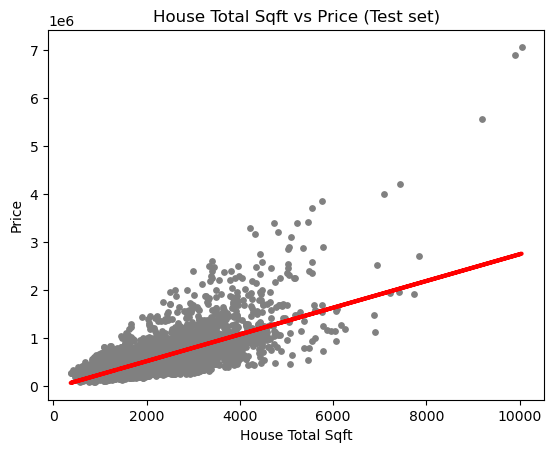

In [28]:
# Plot test data points and the regression line for sqft vs price

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('House Total Sqft vs Price (Test set)')
plot_test.xlabel('House Total Sqft')
plot_test.ylabel('Price')
plot_test.show()

In [29]:
# Export the Regression Line Chart

# plot_test.savefig(os.path.join(path, 'House Market King County USA', '04 - Analysis', 'Visualizations', 'housesqft_price_regression.png'), dpi=300, bbox_inches='tight')

##### --------------------------------------------------

### [10] Write your own interpretation of how well the line appears to fit the data in a markdown cell.

#### I think that the line reflect a true gradual increase only until a certain Total Sqft (at around 5000 sqft with a steady increased price). This shows that houses that are roughly bigger than 5000 sqft do increase in price but the model cannot really follow that line. This also mean that there are few outliers that can cause this, and aswell there is probably other factors that drive price high.

##### --------------------------------------------------

### [11] Check the model performance statistics-MSE and R2 score.

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [31]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  70170013932.1159
R2 score:  0.48889929019453027


#### The MSE score shows that there is a huge difference between the real price and the predicted price, also the R2 score shows that only roughly 49% of these values are affected only by house total sqft, reinforcing again the idea that many variables together increase house prices.

##### --------------------------------------------------

### [12] Compare the predicted y values with the actual y values in a dataframe.

In [32]:
# Check "y_predicted" array

y_predicted

array([[ 360116.30871034],
       [1261900.99358095],
       [ 362899.59477476],
       ...,
       [ 560512.90534826],
       [ 374032.73903242],
       [ 329500.16200177]], shape=(6484, 1))

In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,297000.0,3.601163e+05
1,1578000.0,1.261901e+06
2,562100.0,3.628996e+05
3,631500.0,2.766177e+05
4,780000.0,8.471914e+05
5,485000.0,4.213486e+05
6,340000.0,4.408316e+05
7,335606.0,6.685044e+05
8,425000.0,6.467948e+05
9,490000.0,1.203452e+06


#### I can notice that the predicted values are not even close to the actual values, therefore another confirmation that this model with only one variable is not predicting fairly close enough.

##### Compare how the regression fits the training set

In [34]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [35]:
# Calculate training RMSE and R² to evaluate model performance

rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
# Print model slope, RMSE, and R² for evaluation

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[278.32860644]]
Mean squared error:  67579354793.91106
R2 score:  0.49453356717789776


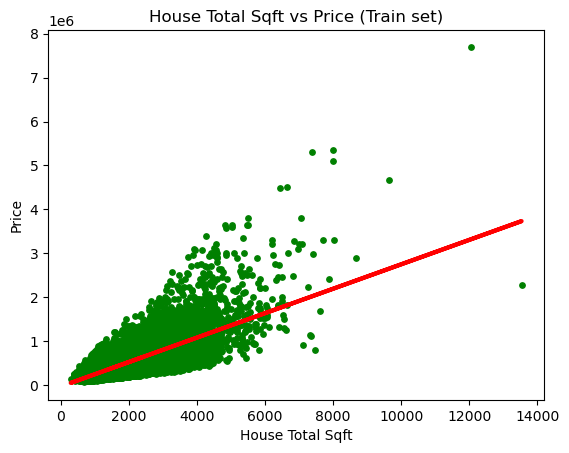

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('House Total Sqft vs Price (Train set)')
plot_test.xlabel('House Total Sqft')
plot_test.ylabel('Price')
plot_test.show()

In [38]:
# Export the Regression Line Chart

# plot_test.savefig(os.path.join(path, 'House Market King County USA', '04 - Analysis', 'Visualizations', 'housesqft_price_regression_train_set.png'), dpi=300, bbox_inches='tight')

### [13] Include your thoughts on how well the model performed on the test set in a markdown cell. | Include any reflections you have on the impact of possible data bias.

#### Overall, the model performed only moderately well on the test set. The regression line shows the general upward trend between house size and price, but the predictions are often far from the actual values, which is confirmed by the low R² score. This suggests that relying on a single variable doesn’t capture the full complexity of housing prices. Other features such as location, grade, renovations, and condition likely play a major role. Additionally, the presence of outliers and uneven distribution of home types may have introduced bias, making the model less accurate on the test data.